In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base

In [52]:
import numpy as np
import pandas as pd

In [53]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [57]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [60]:
query = session.query(measurement.date,measurement.prcp).all()
DF = pd.DataFrame(query, columns = ['date', 'prcp'])
DF

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [61]:
# Design a query to retrieve the last 12 months of precipitation data
lastyear = dt.date(2017,8,23) - dt.timedelta(days = 365)
query = session.query(measurement.date,measurement.prcp).filter(measurement.date >= lastyear).all()
DF = pd.DataFrame(query, columns = ['date', 'prcp'])
DF = DF.set_index(DF['date'])
DF = DF.drop(columns ='date')
DF = DF.sort_values('date')
DF

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


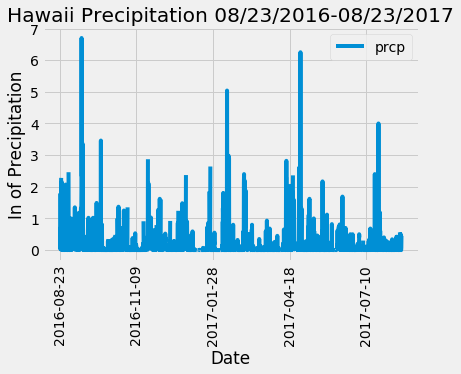

In [62]:
#Plot the results
DF.plot(rot = 90)
plt.title('Hawaii Precipitation 08/23/2016-08/23/2017')
plt.xlabel('Date')
plt.ylabel('In of Precipitation')
plt.savefig("prcp.png")

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
DF.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [64]:
# Design a query to show how many stations are available in this dataset
session.query(func.count(station.station)).all()

[(9)]

In [65]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mostactivestations = session.query(measurement.station, func.count(measurement.station))\
.group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
mostactive = mostactivestations[0]

In [66]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

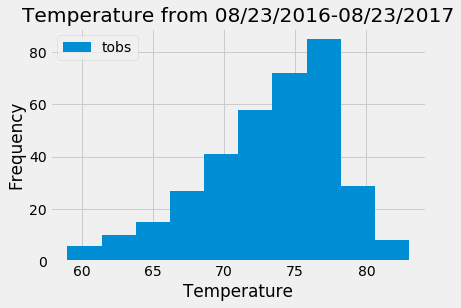

In [67]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_tobs = session.query(measurement.tobs).\
filter(measurement.station == 'USC00519281', measurement.station == station.station,\
      measurement.date >="2016-08-24", measurement.date <="2017-08-23").all()
mast = pd.DataFrame(most_active_station_tobs)
mast.plot.hist()
plt.title('Temperature from 08/23/2016-08/23/2017')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig("temp.png")